In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp=\\

import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3

'%.3f'

In [23]:
cd ..

/work/free_jupyter


In [24]:
cd sample.gitignore

/work/free_jupyter/sample.gitignore


In [8]:
beer = pd.read_csv("5-1-1-beer.csv")
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


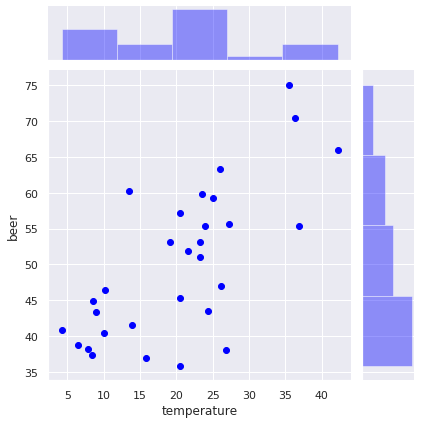

In [9]:
sns.jointplot(x = "temperature", y = "beer", data = beer, color = 'blue')

In [10]:
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

In [11]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 28 Aug 2020   Prob (F-statistic):           1.11e-05
Time:                        07:47:32   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
null_model = smf.ols("beer ~ 1", data = beer).fit()

In [13]:
null_model.aic

227.94194972563105

In [15]:
lm_model.aic #説明変数＝気温入りモデル

208.9090293557544

In [16]:
lm_model.llf

-102.4545146778772

In [17]:
lm_model.df_model

1.000

In [18]:
-2*(lm_model.llf - (lm_model.df_model + 1))

208.9090293557544

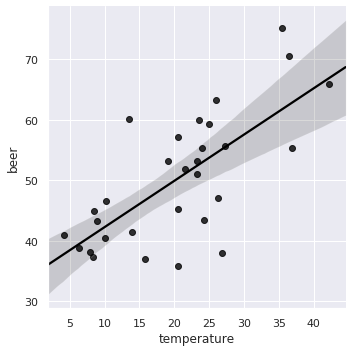

In [19]:
sns.lmplot(x = "temperature", y = "beer", data = beer, scatter_kws = {"color": "black"}, line_kws = {"color": "black"})

In [20]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [21]:
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

In [22]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [28]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [29]:
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [31]:
y_hat = lm_model.fittedvalues
y_hat.head()

0    50.301481
1    53.745905
2    42.264491
3    55.200217
4    46.703971
dtype: float64

In [33]:
(beer.beer - y_hat).head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [34]:
mu = sp.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

sp.sum((yhat - mu) ** 2) / sp.sum ((y - mu) ** 2)

0.5039593230611878

In [35]:
lm_model.rsquared

0.5039593230611856

In [36]:
sp.sum((yhat - mu) ** 2) + sum(resid ** 2)

3277.1146666666727

In [37]:
sp.sum((y - mu) ** 2)

3277.114666666666

In [39]:
1 - sp.sum(resid ** 2) / sp.sum((y - mu) ** 2)

0.5039593230611856

In [40]:
lm_model.rsquared_adj

0.4862435845990851

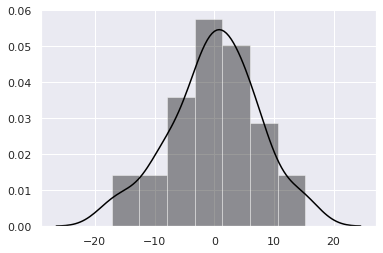

In [41]:
sns.distplot(resid, color = 'black')

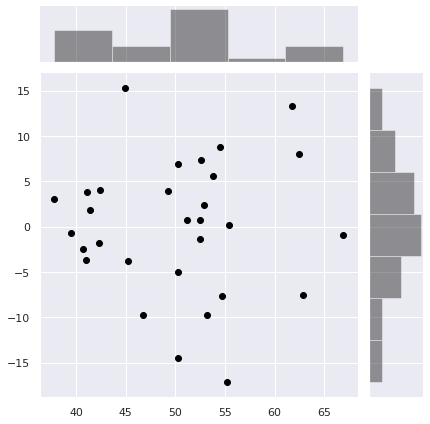

In [42]:
sns.jointplot(lm_model.fittedvalues, resid, joint_kws = {"color" : "black"}, marginal_kws = {"color" : "black"}
              )

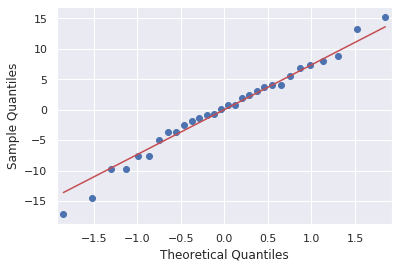

In [43]:
fig = sm.qqplot(resid, line = "s")

## 分散分析

* 平均値の差を検定する手法。三つ以上の水準間の平均値に差があるかどうかを検定する際に使用。
* →t検定で順に調べていくのもありだが、検定を重ねすぎると**検定の多重性**が生じてしまう恐れ。

* データの変動を「誤差」と「効果」に分離する。そこで**F比**という統計量を使用する。
* →F比が大きい場合誤差よりも効果の影響があるということになる。


#### 群間変動と群内変動
* 効果の大きさのことを群間変動
* ごさの大きさのことを群内変動


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3

In [4]:
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]

beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({
    "beer":beer,
    "weather":weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


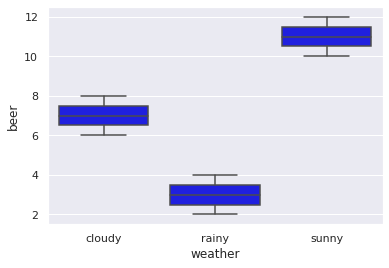

In [5]:
sns.boxplot(x = "weather", y = "beer", data = weather_beer, color = "blue")

In [6]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


In [7]:
effect = [7, 7, 3, 3, 11, 11]

In [8]:
mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect) ** 2)
squares_model

64.0

In [10]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [11]:
squares_resid = sp.sum(resid ** 2)
squares_resid

6

In [12]:
df_model = 2 #elements(cloudy, rainy, sunny) - 1
df_resid = 3 #sample_size - level

In [13]:
variance_model = squares_model / df_model
variance_model

32.0

In [14]:
variance_resid = squares_resid / df_resid
variance_resid

2.0

In [16]:
f_ratio = variance_model / variance_resid
f_ratio

16.0

In [17]:
1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.02509457330439091

In [18]:
anova_model = smf.ols("beer ~ weather", data = weather_beer).fit()

In [19]:
print(sm.stats.anova_lm(anova_model, type=2))

           df  sum_sq  mean_sq     F    PR(>F)
weather   2.0    64.0     32.0  16.0  0.025095
Residual  3.0     6.0      2.0   NaN       NaN


In [20]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [21]:
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [22]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [25]:
beer = pd.read_csv("5-1-1-beer.csv")
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

In [26]:
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


In [27]:
print(len(beer))

30


In [28]:
df_lm_model = 1
df_lm_resid = 28

In [30]:
lm_effect = lm_model.fittedvalues
lm_resid = lm_model.resid
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model

squares_lm_resid = sp.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid

f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.446983688504666

In [31]:
print(sm.stats.anova_lm(lm_model, type=2))

               df       sum_sq      mean_sq          F    PR(>F)
temperature   1.0  1651.532489  1651.532489  28.446984  0.000011
Residual     28.0  1625.582178    58.056506        NaN       NaN


In [32]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           1.11e-05
Time:                        01:31:21   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 複数の説明変数を持つモデル

In [33]:
sales = pd.read_csv("5-3-1-lm-model.csv")
sales.head()

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy


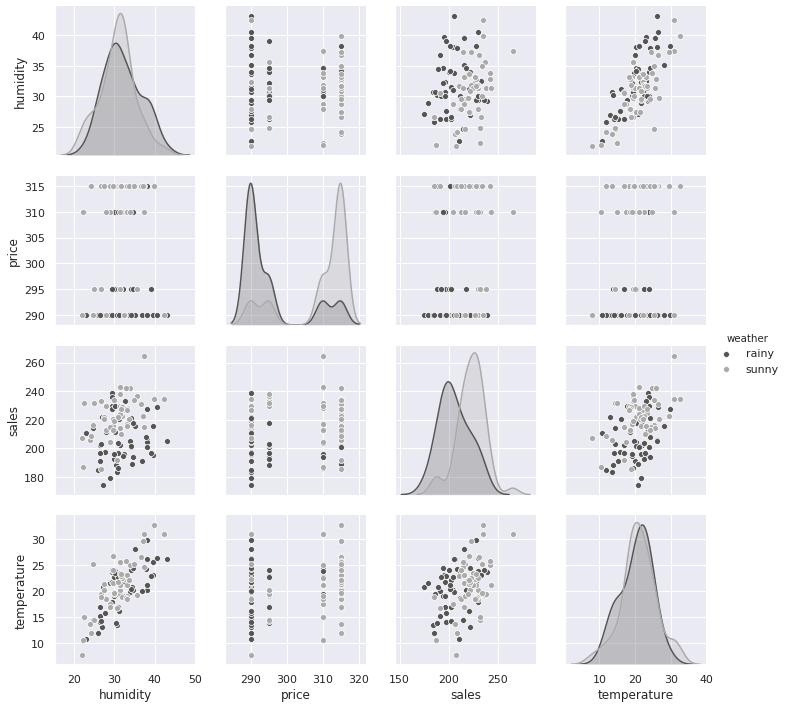

In [35]:
sns.pairplot(data = sales, hue = "weather", palette="gray")

In [37]:
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [40]:
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


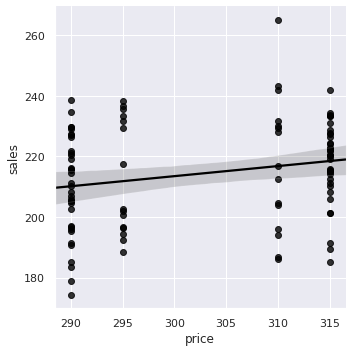

In [41]:
sns.lmplot(x = "price", y = "sales", data = sales, scatter_kws = {"color":"black"}, line_kws = {"color":"black"})

In [42]:
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


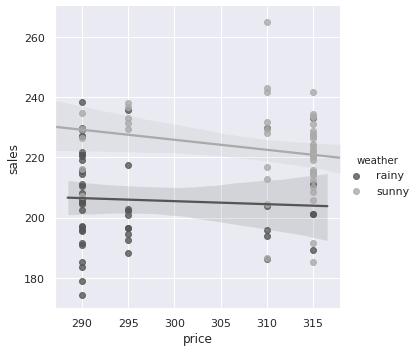

In [43]:
sns.lmplot(x = "price", y = "sales", data = sales, hue = "weather", palette = "gray") 

In [46]:
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price", data = sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [48]:
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [49]:
lm_sales_2 = smf.ols("sales ~ weather + temperature + humidity + price", data = sales).fit()
lm_sales_2.params
print(sm.stats.anova_lm(lm_sales_2, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [50]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [51]:
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [52]:
mod_full = smf.ols("sales ~ weather + humidity + temperature + price", sales).fit()
resid_sq_full = sp.sum(mod_full. resid ** 2)
resid_sq_full

17242.71694236649